<a href="https://colab.research.google.com/github/nataliapazin/ANN_Trabalho1/blob/main/Trabalho_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score 

In [119]:
# para gerar o grafico no browser
%matplotlib inline

In [120]:
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [121]:
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [122]:
!git clone https://github.com/nataliapazin/ANN_Trabalho1
%cd ANN_Trabalho1

Cloning into 'ANN_Trabalho1'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.
/content/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1/ANN_Trabalho1


In [123]:
# leitura dos dados
DAT=pd.read_csv("Extraction_Data.csv",delimiter=";")
print(DAT)

    S.N  X1   X2   X3  X4  Dry Height
0     1  10  3.0  1.5  25     0.50560
1     2  20  3.0  1.5  25     0.62205
2     3  10  6.0  1.5  25     0.68300
3     4  20  6.0  1.5  25     0.35209
4     5  15  4.5  1.0  15     0.62450
5     6  15  4.5  2.0  15     0.61000
6     7  15  4.5  1.0  35     1.65230
7     8  15  4.5  2.0  35     0.85650
8     9  10  4.5  1.5  15     0.25890
9    10  20  4.5  1.5  15     0.18430
10   11  10  4.5  1.5  35     0.97200
11   12  20  4.5  1.5  35     0.87600
12   13  15  3.0  1.0  25     1.01980
13   14  15  6.0  1.0  25     1.20910
14   15  15  3.0  2.0  25     1.21900
15   16  15  4.5  2.0  25     0.48630
16   17  10  4.5  1.0  25     1.00700
17   18  20  4.5  1.0  25     0.70100
18   19  10  4.5  2.0  25     0.32600
19   20  20  3.0  2.0  25     0.38870
20   21  15  6.0  1.5  15     0.54700
21   22  15  3.0  1.5  15     0.44200
22   23  15  6.0  1.5  35     1.20430
23   24  15  4.5  1.5  35     1.20534
24   25  15  4.5  1.5  25     1.63150
25   26  15 

In [124]:
# separa os dados em normatizados e originais
DAT_OLD=[]
# Guarda os dados antes de serem normatizados, para que não sejam perdidos
DAT_OLD=DAT.copy()
DAT=Normatiza(DAT)
print(DAT.head())
print('================================================================')
print(DAT_OLD.head())

        S.N   X1   X2   X3   X4  Dry Height
0 -1.000000 -1.0 -1.0  0.0  0.0   -0.562262
1 -0.923077  1.0 -1.0  0.0  0.0   -0.403610
2 -0.846154 -1.0  1.0  0.0  0.0   -0.320572
3 -0.769231  1.0  1.0  0.0  0.0   -0.771403
4 -0.692308  0.0  0.0 -1.0 -1.0   -0.400272
   S.N  X1   X2   X3  X4  Dry Height
0    1  10  3.0  1.5  25     0.50560
1    2  20  3.0  1.5  25     0.62205
2    3  10  6.0  1.5  25     0.68300
3    4  20  6.0  1.5  25     0.35209
4    5  15  4.5  1.0  15     0.62450


In [125]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
#train e test possui tanto x (entrada/independente) quanto y (saida/dependente)
print(train.head())
print("===================================================================")
print(train.shape[0]) #mostrar o numero de linhas
print("===================================================================")
print(test.head())
print("===================================================================")
print(test.shape[0])

         S.N   X1   X2   X3   X4  Dry Height
20  0.538462  0.0  1.0  0.0 -1.0   -0.505858
19  0.461538  1.0 -1.0  1.0  0.0   -0.721526
2  -0.846154 -1.0  1.0  0.0  0.0   -0.320572
13  0.000000  0.0  1.0 -1.0  0.0    0.396185
7  -0.461538  0.0  0.0  1.0  1.0   -0.084196
22
         S.N   X1   X2   X3   X4  Dry Height
4  -0.692308  0.0  0.0 -1.0 -1.0   -0.400272
15  0.153846  0.0  0.0  1.0  0.0   -0.588556
17  0.307692  1.0  0.0 -1.0  0.0   -0.296049
21  0.615385  0.0 -1.0  0.0 -1.0   -0.648910
26  1.000000  0.0  0.0  0.0  0.0    0.954768
5


In [126]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1,2,3]]
x_test=test.iloc[:,[0,1,2,3]]
X_OLD=DAT_OLD.iloc[:,[0,1,2,3]]
print(x_test.head())
print('================================================================')
print(x_train.head())
print('================================================================')
print(X_OLD.head())

         S.N   X1   X2   X3
4  -0.692308  0.0  0.0 -1.0
15  0.153846  0.0  0.0  1.0
17  0.307692  1.0  0.0 -1.0
21  0.615385  0.0 -1.0  0.0
26  1.000000  0.0  0.0  0.0
         S.N   X1   X2   X3
20  0.538462  0.0  1.0  0.0
19  0.461538  1.0 -1.0  1.0
2  -0.846154 -1.0  1.0  0.0
13  0.000000  0.0  1.0 -1.0
7  -0.461538  0.0  0.0  1.0
   S.N  X1   X2   X3
0    1  10  3.0  1.5
1    2  20  3.0  1.5
2    3  10  6.0  1.5
3    4  20  6.0  1.5
4    5  15  4.5  1.0


In [127]:
Index=[5]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print(y_test.head())
print('================================================================')
print(y_train.head())
print('================================================================')
print(Y_OLD.head())

    Dry Height
4    -0.400272
15   -0.588556
17   -0.296049
21   -0.648910
26    0.954768
    Dry Height
20   -0.505858
19   -0.721526
2    -0.320572
13    0.396185
7    -0.084196
   Dry Height
0     0.50560
1     0.62205
2     0.68300
3     0.35209
4     0.62450


In [130]:
clf = MLPRegressor(solver='lbfgs',activation='logistic',alpha=1e-5,hidden_layer_sizes=(8), random_state=None)
clf.fit(x_train, y_train)
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Dry Height'].copy()
resist_obs_train=train['Dry Height'].copy()
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Dry Height'].copy()
resist_obs_test=test['Dry Height'].copy()
print('===== TREINAMENTO SUPERIOR =====')
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)
print('===== TESTE SUPERIOR =====')
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)
print('==========================')

===== TREINAMENTO SUPERIOR =====
MSE treino= 0.0008144046380728655
R^2 treino= 0.9922823084093148
===== TESTE SUPERIOR =====
MSE teste= 0.2629068251963274
R^2 teste= -1.6099367146270538


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


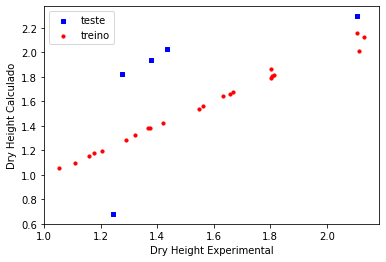

In [131]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)#mostra dois graficos sob o mesmo eixo 

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Dry Height Calculado')
plt.xlabel('Dry Height Experimental')
plt.show()

In [134]:
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
print(y_calc_test)
print(y_calc_test.shape[0])


   Dry Height
0    2.635276
1    2.574361
2    2.683373
3    1.958936
4    2.828365
5
